In [ ]:
import pandas as pd
from google.colab import files
files.upload()
df = pd.read_csv("food_orders.csv")

Saving food_orders.csv to food_orders (4).csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('food_orders.csv')

# Remove duplicate orders
df = df.drop_duplicates(subset='order_id')

# Preview data
print(df.head())


   order_id  restaurant    items  order_value  delivery_time payment_mode
0      1001   UrbanEats  Biryani          366           23.0       Wallet
1      1002   QuickDine    Fries          337           49.0       Wallet
2      1003  TastyBites  Biryani          529           56.0          UPI
3      1004   QuickDine    Fries          642           42.0       Wallet
4      1005   QuickDine  Biryani          190           58.0          UPI


In [ ]:
avg_order_value = df.groupby('restaurant')['order_value'].mean().reset_index()
print(avg_order_value.sort_values(by='order_value', ascending=False))


      restaurant  order_value
3     TastyBites        511.8
0  FoodiesCorner        483.2
1      QuickDine        461.8
2       SpiceHub        450.0
4      UrbanEats        420.0


       payment_mode  count
0            Wallet     14
1               UPI     14
2              Card     12
3  Cash on Delivery     10


/tmp/ipython-input-4217711276.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='payment_mode', y='count', data=payment_pref, palette='Set2')


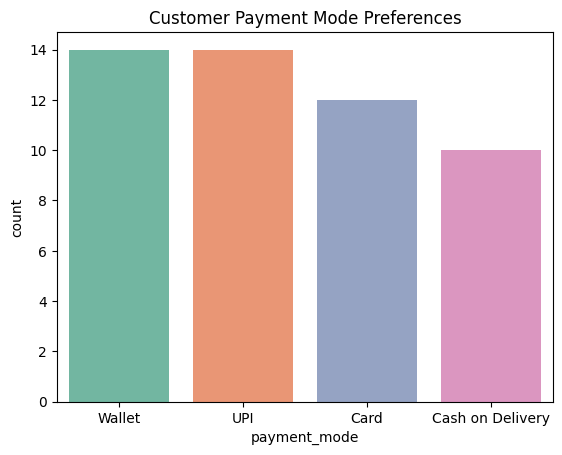

In [ ]:
payment_pref = df['payment_mode'].value_counts().reset_index()
payment_pref.columns = ['payment_mode', 'count']
print(payment_pref)

# Optional visualization
sns.barplot(x='payment_mode', y='count', data=payment_pref, palette='Set2')
plt.title('Customer Payment Mode Preferences')
plt.show()


In [ ]:
mean_delivery_time = df['delivery_time'].mean()
df['delivery_time'] = df['delivery_time'].fillna(mean_delivery_time)


In [ ]:
df['delivery_time'].isnull().sum()  # Should be 0 now


np.int64(0)

In [ ]:
correlation = df['order_value'].corr(df['delivery_time'])
print("Correlation between order_value and delivery_time:", correlation)


Correlation between order_value and delivery_time: -0.21133332909681984


/tmp/ipython-input-1570869126.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='restaurant', y='order_value', data=top_restaurants, palette='Blues_d')


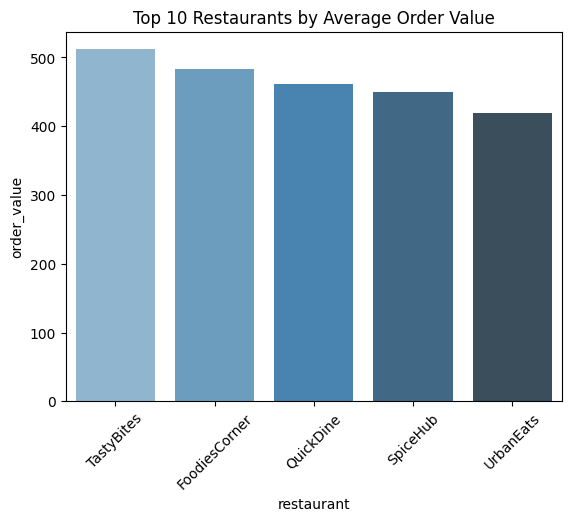

In [ ]:
top_restaurants = avg_order_value.sort_values(by='order_value', ascending=False).head(10)

sns.barplot(x='restaurant', y='order_value', data=top_restaurants, palette='Blues_d')
plt.title('Top 10 Restaurants by Average Order Value')
plt.xticks(rotation=45)
plt.show()


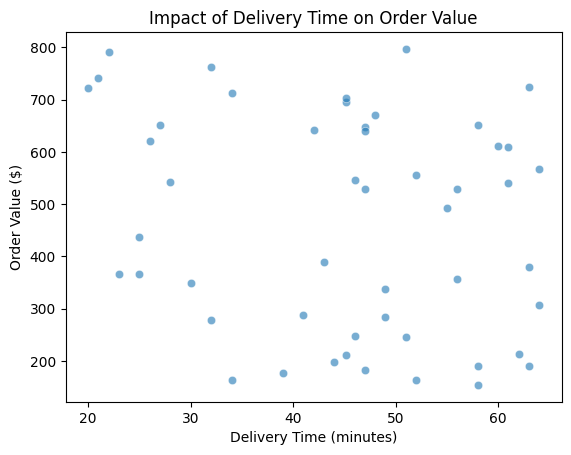

In [ ]:
sns.scatterplot(x='delivery_time', y='order_value', data=df, alpha=0.6)
plt.title('Impact of Delivery Time on Order Value')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Order Value ($)')
plt.show()
